# Практическая работа № 8

## Используя data.csv

In [1]:
!pip3 install apriori_python
!pip3 install apyori
!pip3 install efficient_apriori
!pip3 install fpgrowth_py

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import apriori_python
import apyori
import efficient_apriori
from fpgrowth_py import fpgrowth

In [3]:
market_data = pd.read_csv('data.csv', header=None)

market_data = pd.DataFrame(market_data)

market_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9531 entries, 0 to 9530
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       9208 non-null   object
 1   1       5840 non-null   object
 2   2       2959 non-null   object
 3   3       1505 non-null   object
 4   4       596 non-null    object
 5   5       245 non-null    object
 6   6       91 non-null     object
 7   7       36 non-null     object
 8   8       13 non-null     object
 9   9       9 non-null      object
 10  10      4 non-null      object
 11  11      1 non-null      object
dtypes: object(12)
memory usage: 893.7+ KB


In [4]:
# Подсчет частоты встречаемости каждого товара
market_data.stack().value_counts()

Coffee              5471
Bread               3325
Tea                 1435
Cake                1025
Pastry               856
                    ... 
Olum & polenta         1
Gift voucher           1
Coffee granules        1
Raw bars               1
Chicken sand           1
Length: 102, dtype: int64

In [5]:
market_data.stack().value_counts(normalize=True)

Coffee              0.266787
Bread               0.162140
Tea                 0.069976
Cake                0.049983
Pastry              0.041742
                      ...   
Olum & polenta      0.000049
Gift voucher        0.000049
Coffee granules     0.000049
Raw bars            0.000049
Chicken sand        0.000049
Length: 102, dtype: float64

<Axes: >

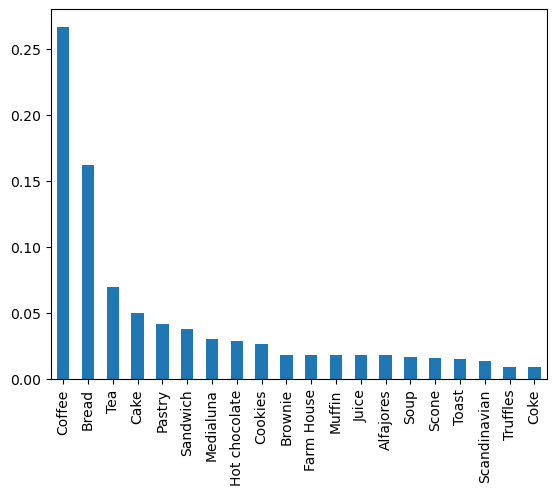

In [6]:
# Выбор 20 наиболее популярных - относительная
market_data.stack().value_counts(normalize=True).head(20).plot(kind='bar')

<Axes: >

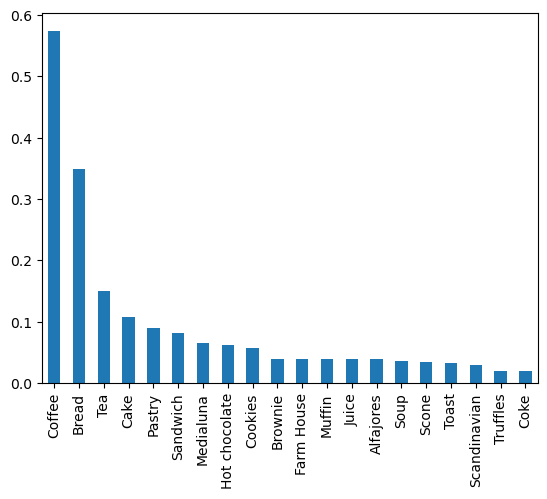

In [7]:
# Выбор 20 наиболее популярных - фактическая
market_data.stack().value_counts().head(20).apply(
    lambda item: item / market_data.shape[0]).plot(kind='bar')

In [8]:
transations = []
for i in range(market_data.shape[0]):
    row = market_data.iloc[i].dropna().to_list()
    transations.append(row)


print(transations[0][0])
print(transations[0])

min_sup = 0.05
min_conf = 0.1

Bread
['Bread']


In [9]:
# Применение алгоритма Apriori с использованием apriori_python
t = []
start = time.perf_counter()

t1, rules = apriori_python.apriori(transations, minSup=min_sup, minConf=min_conf)

time1 = time.perf_counter() - start
t.append(time1)
rules

[[{'Coffee'}, {'Cake'}, 0.11439929328621908],
 [{'Coffee'}, {'Bread'}, 0.1881625441696113],
 [{'Bread'}, {'Coffee'}, 0.27510494026477234],
 [{'Cake'}, {'Coffee'}, 0.5269582909460834]]

In [10]:
# Применение алгоритма Apriori с использованием apyori
start = time.perf_counter()

rules = apyori.apriori(transactions=transations, 
                       min_support = min_sup,
                       min_confidence = min_conf,
                       min_lift = 1.0001
                       )

results = list(rules)

time2 = (time.perf_counter() - start)
t.append(time2)

for result in results:
    for subset in result[2]:
        print(subset[0], subset[1])
        print("Support: {0}; Confidence: {1}; Lift: {2}".format(result[1], subset[2], subset[3]))
        print()

frozenset({'Cake'}) frozenset({'Coffee'})
Support: 0.054348966530269646; Confidence: 0.5269582909460834; Lift: 1.1091959962471556

frozenset({'Coffee'}) frozenset({'Cake'})
Support: 0.054348966530269646; Confidence: 0.11439929328621908; Lift: 1.1091959962471556



In [11]:
# Применение алгоритма Apriori с использованием efficient_apriori
start = time.perf_counter()
itemsets, rules = efficient_apriori.apriori(transations, min_support=min_sup, min_confidence=min_conf)
time3 = time.perf_counter() - start
t.append(time3)
for i in range(len(rules)):
    print(rules[i])

{Coffee} -> {Bread} (conf: 0.188, supp: 0.089, lift: 0.579, conv: 0.832)
{Bread} -> {Coffee} (conf: 0.275, supp: 0.089, lift: 0.579, conv: 0.724)
{Coffee} -> {Cake} (conf: 0.114, supp: 0.054, lift: 1.109, conv: 1.013)
{Cake} -> {Coffee} (conf: 0.527, supp: 0.054, lift: 1.109, conv: 1.110)


In [12]:
# Применение алгоритма FP-Growth с использованием fpgrowth_py
start = time.perf_counter()
itemsets, rules = fpgrowth(transations, minSupRatio=min_sup, minConf=min_conf)
time4 = time.perf_counter() - start
t.append(time4)

for i in range(len(rules)):
    print(rules[i])

[{'Sandwich'}, {'Coffee'}, 0.5323529411764706]
[{'Pastry'}, {'Coffee'}, 0.5521472392638037]
[{'Coffee'}, {'Cake'}, 0.11439929328621908]
[{'Cake'}, {'Coffee'}, 0.5269582909460834]
[{'Coffee'}, {'Tea'}, 0.10424028268551237]
[{'Tea'}, {'Coffee'}, 0.3496296296296296]
[{'Coffee'}, {'Bread'}, 0.1881625441696113]
[{'Bread'}, {'Coffee'}, 0.27510494026477234]


Время выполнения apriori_python:  0.19312250000075437 

Время выполнения apyori:  0.005034900000282505 

Время выполнения efficient_apriori:  0.003774699999667064 

Время выполнения fpgrowth:  0.06949149999945803 



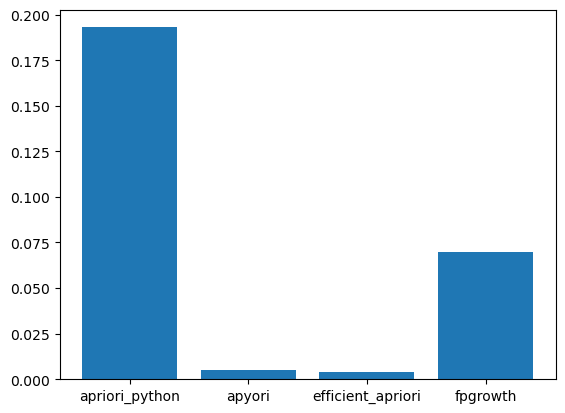

In [13]:
print('Время выполнения apriori_python: ', t[0], '\n')
print('Время выполнения apyori: ', t[1], '\n')
print('Время выполнения efficient_apriori: ', t[2], '\n')
print('Время выполнения fpgrowth: ', t[3], '\n')
plt.bar(['apriori_python','apyori','efficient_apriori','fpgrowth'],t)
plt.show()